In [1]:
import pandas as pd
import os
from datetime import datetime as dt
import wrangle
import re
from pandas.tseries.holiday import USFederalHolidayCalendar
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (20,12)
alpha =.05

### Acquire 

In [2]:
df = wrangle.get_ercot_df()
df.head()

,ercot_load,dow,is_weekday,is_obs_holiday
datetime,,,,
2010-01-01 01:00:00,7775.456846,Friday,1,1
2010-01-01 02:00:00,7704.815982,Friday,1,1
2010-01-01 03:00:00,7650.575724,Friday,1,1
2010-01-01 04:00:00,7666.708317,Friday,1,1
2010-01-01 05:00:00,7744.960869,Friday,1,1


### Explore

In [3]:
# split data into train and test datasets, train 2010-2017 and test 2018-2022

train = df[:'2017']
test = df['2018':]

In [4]:
train.head()

,ercot_load,dow,is_weekday,is_obs_holiday
datetime,,,,
2010-01-01 01:00:00,7775.456846,Friday,1,1
2010-01-01 02:00:00,7704.815982,Friday,1,1
2010-01-01 03:00:00,7650.575724,Friday,1,1
2010-01-01 04:00:00,7666.708317,Friday,1,1
2010-01-01 05:00:00,7744.960869,Friday,1,1


In [5]:
train.tail()

,ercot_load,dow,is_weekday,is_obs_holiday
datetime,,,,
2017-12-31 19:00:00,12061.549401,Sunday,0,0
2017-12-31 20:00:00,12015.663549,Sunday,0,0
2017-12-31 21:00:00,11883.114122,Sunday,0,0
2017-12-31 22:00:00,11754.250889,Sunday,0,0
2017-12-31 23:00:00,11579.853459,Sunday,0,0


In [6]:
test.head()

,ercot_load,dow,is_weekday,is_obs_holiday
datetime,,,,
2018-01-01 00:00:00,11452.163689,Monday,1,1
2018-01-01 01:00:00,11425.979115,Monday,1,1
2018-01-01 02:00:00,11408.418023,Monday,1,1
2018-01-01 03:00:00,11405.198365,Monday,1,1
2018-01-01 04:00:00,11450.560138,Monday,1,1


In [7]:
test.tail()

,ercot_load,dow,is_weekday,is_obs_holiday
datetime,,,,
2022-06-30 20:00:00,14700.132848,Thursday,1,0
2022-06-30 21:00:00,14637.633680,Thursday,1,0
2022-06-30 22:00:00,14543.743791,Thursday,1,0
2022-06-30 23:00:00,14065.386852,Thursday,1,0
2022-07-01 00:00:00,13484.378935,Friday,1,0


### Initial look at the target variable

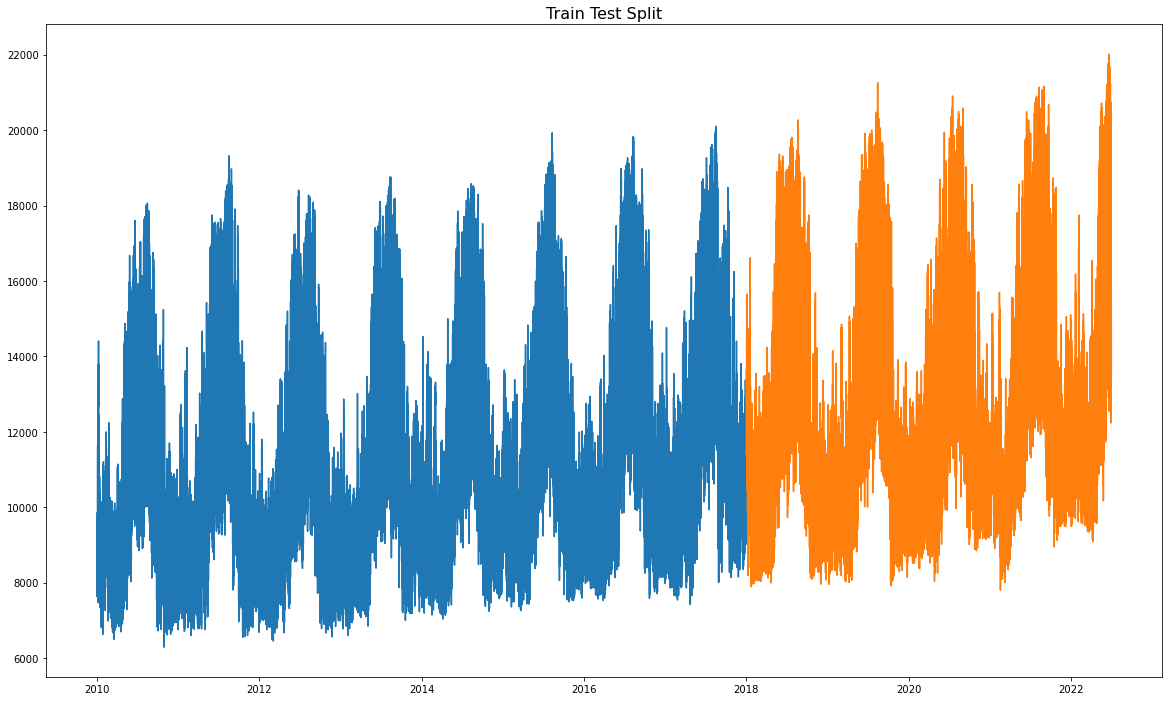

In [8]:
plt.plot(train.index, train.ercot_load)
plt.plot(test.index, test.ercot_load)
plt.title('Train Test Split', fontsize = 16)
plt.show()

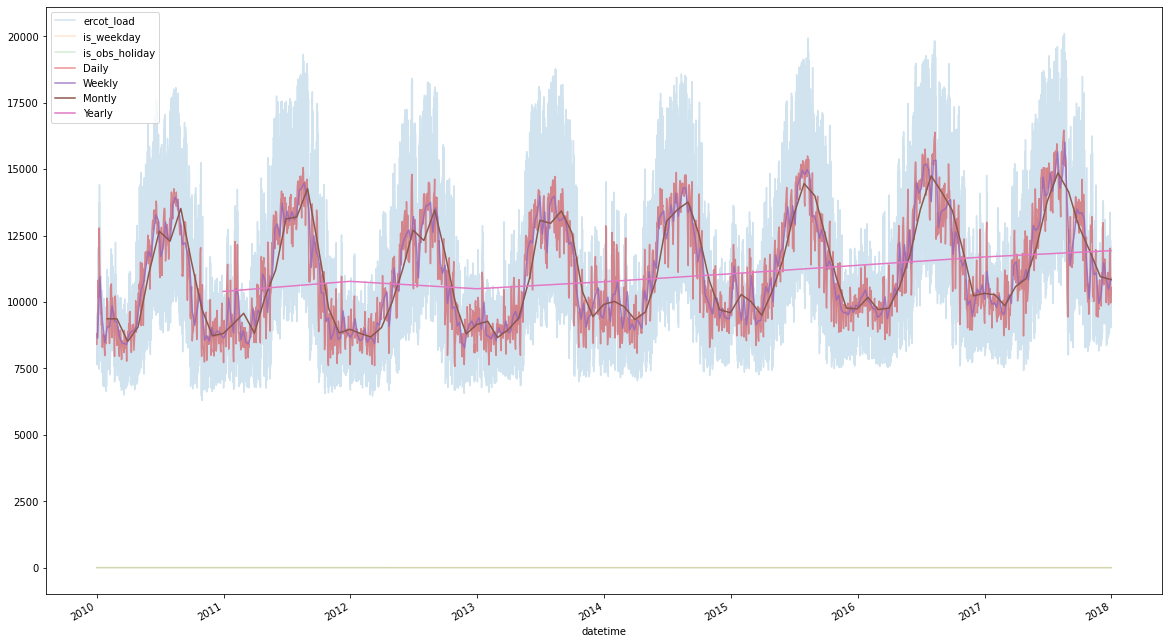

In [9]:
train.plot(alpha=.2, label='Hourly')
train.resample('D').ercot_load.mean().plot(alpha=.5, label='Daily')
train.resample('W').ercot_load.mean().plot(alpha=.8, label='Weekly')
train.resample('M').ercot_load.mean().plot(label='Montly')
train.resample('Y').ercot_load.mean().plot(label='Yearly')
plt.legend()
plt.show()

**Notes:** Seasonality is visible, with an increase in ercot load over time.

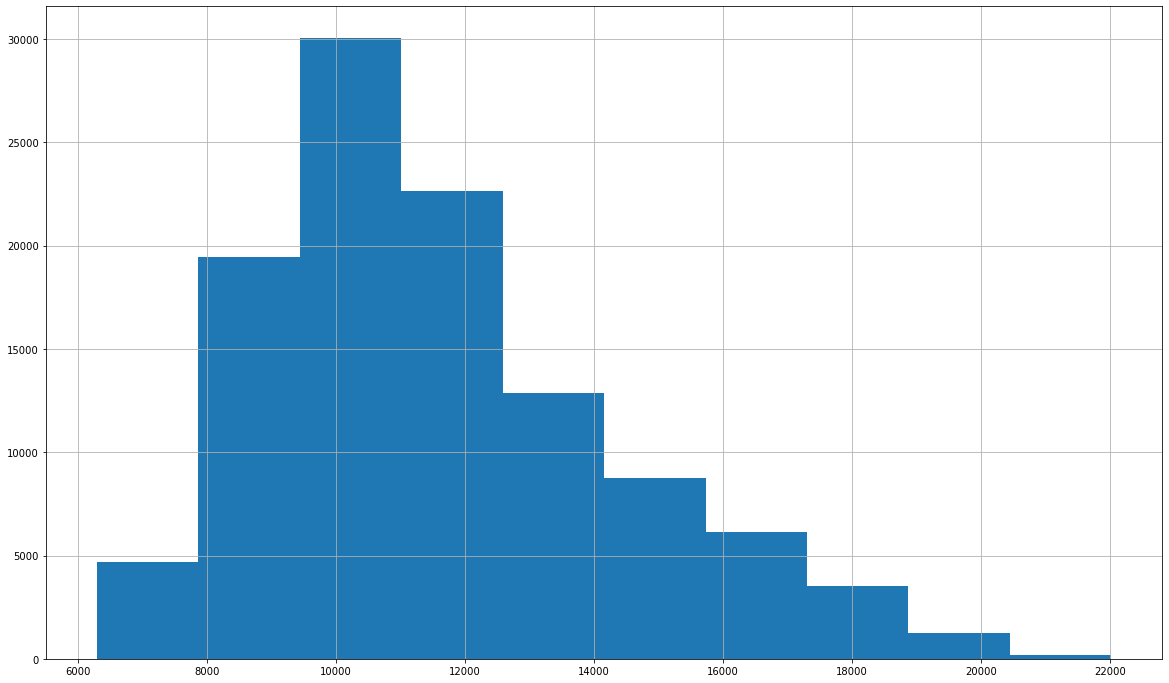

In [10]:
df.ercot_load.hist()
plt.show()

### Inital Hypotheses:
   - There is a relationship between the day of the week and energy demand.
   - There is a relationship between the time of day and energy demand.
   - There is a relationship between holidays and energy demand.

### Day of the Week:

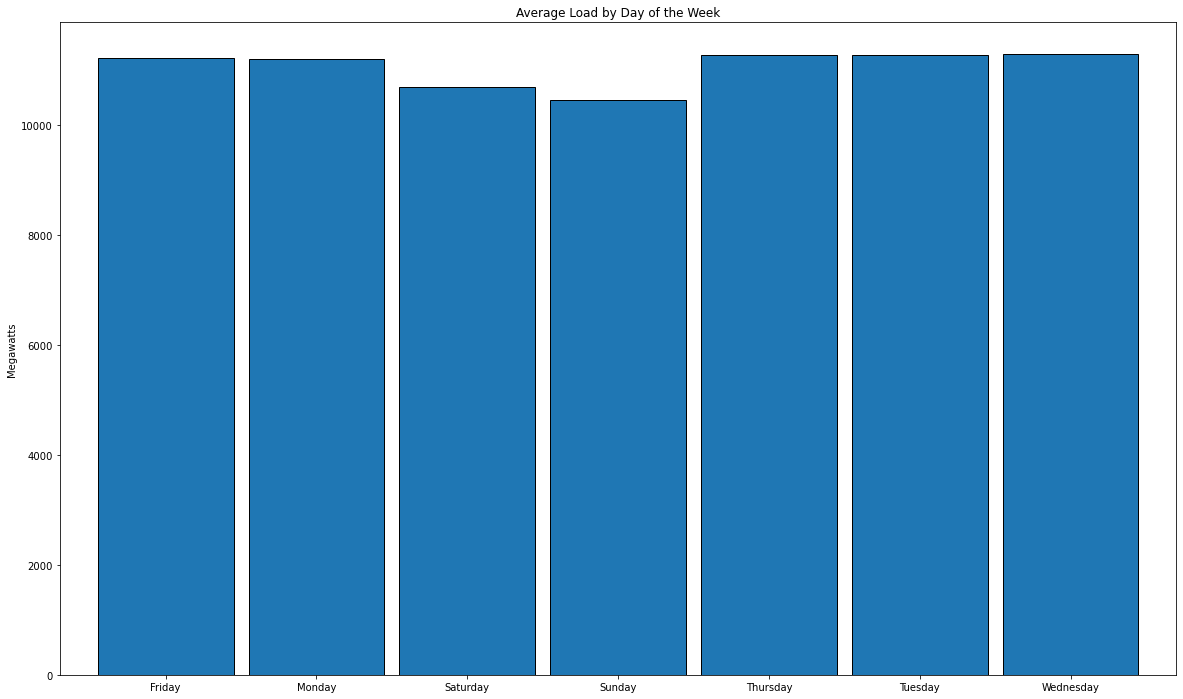

In [11]:
ax = train.groupby(train.dow).ercot_load.mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Load by Day of the Week', xlabel='', ylabel='Megawatts')
plt.show()

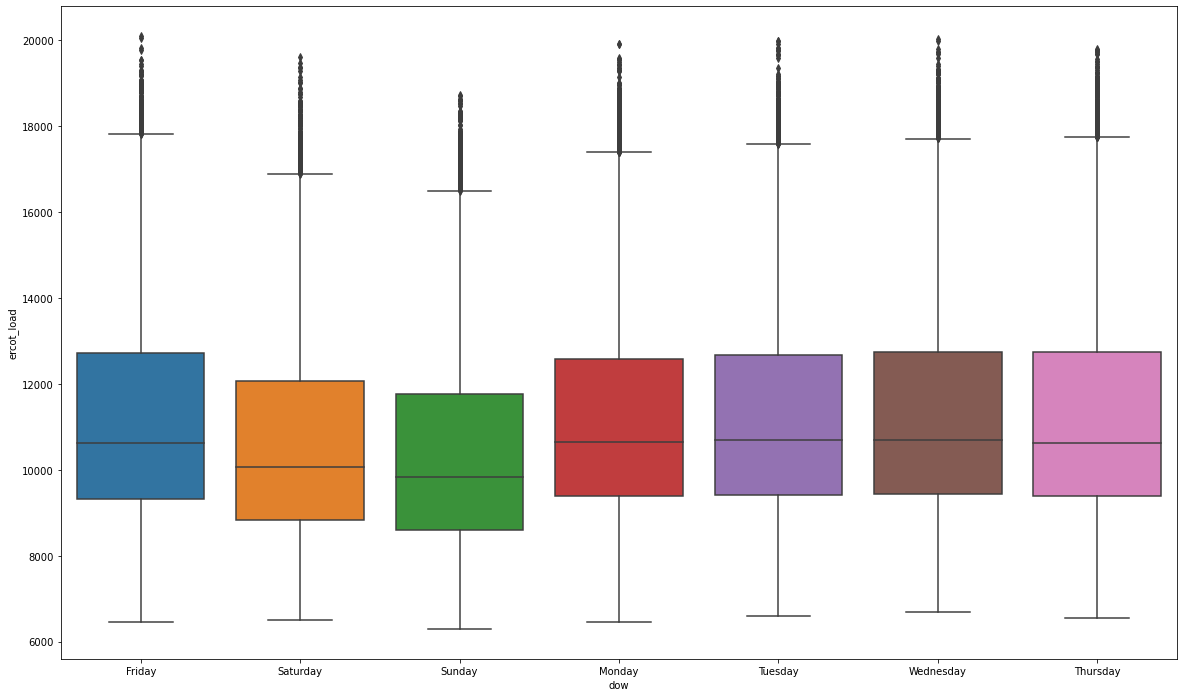

In [12]:
sns.boxplot(x = 'dow', y = 'ercot_load', data=train) 
plt.show()

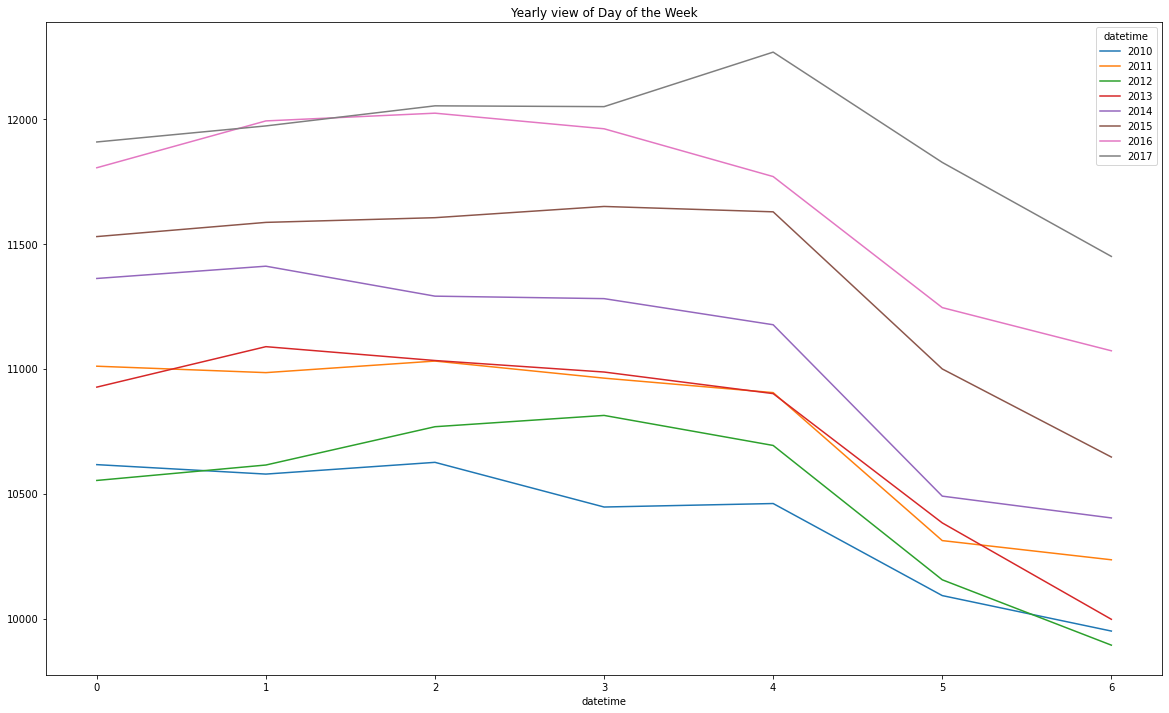

In [13]:
train.groupby([train.index.year, train.index.dayofweek]).ercot_load.mean().unstack(0).plot(title='Yearly view of Day of the Week')
plt.show()

### Hypothesis Testing
 - What hypothesis testing is viable on time series data?


In [14]:
# for day in train.dow:
#     print(train.ercot_load.var())

In [15]:
monday = train[train.dow=='Monday'].ercot_load
tuesday = train[train.dow=='Tuesday'].ercot_load
wednesday = train[train.dow=='Wednesday'].ercot_load
thursday = train[train.dow=='Thursday'].ercot_load
friday = train[train.dow=='Friday'].ercot_load
saturday = train[train.dow=='Saturday'].ercot_load
sunday = train[train.dow=='Sunday'].ercot_load

#### Perform Levene's Test for Equal Variance
- Null: Variance is equal between the days of the week.
- Alternative: Variance is not equal between the days of the week.

In [16]:
stat, p = stats.levene(tuesday,wednesday,thursday,friday,saturday,sunday)

In [17]:
p

1.4286596663378003e-10

In [18]:
if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis.


#### Perform Kruskal- Wallis Test to determine significant difference between ercot load and the day of the week.
 - Kruskal-Wallis test performed as variance is not equal.
 
- Null: The mean of ercot load is equal on every day of the week.
- Alternative: The mean of ercot load is not equal for each day of the week.

In [19]:
stat, p =stats.kruskal(tuesday,wednesday,thursday,friday,saturday,sunday)
stat, p

(1280.150860781112, 1.2749714937213317e-274)

In [20]:
if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis.


In [21]:
monday[monday.isna()==True]

datetime
2016-11-07   NaN
Name: ercot_load, dtype: float64

In [22]:
total_df = wrangle.get_combined_df()
total_df.head()

AttributeError: module 'wrangle' has no attribute 'get_combined_df'